In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [5]:
# 权重w保存在coef_属性中， 偏移b保存在intercept_属性中
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [7]:
print("Train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Train set score: 0.67
Test set score: 0.66


In [8]:
# 波士顿房价的线性拟合示例
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr2 = LinearRegression().fit(X_train, y_train)

print("Train set score: {:.2f}".format(lr2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr2.score(X_test, y_test)))

Train set score: 0.95
Test set score: 0.61


[ridge] Train set score: 0.89
[ridge] est set score: 0.75
[ridge10] Train set score: 0.79
[ridge10] Test set score: 0.64
[ridge10] Train set score: 0.93
[ridge10] Test set score: 0.77


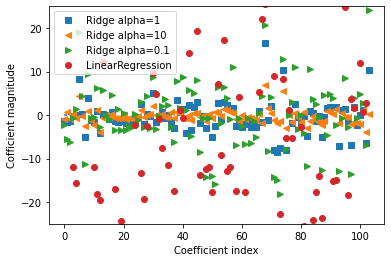

In [35]:
# 岭回归（ridge regression)
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

ridge = Ridge().fit(X_train, y_train)
print("[ridge] Train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("[ridge] est set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("[ridge10] Train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("[ridge10] Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("[ridge10] Train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("[ridge10] Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '<', label="Ridge alpha=10")
plt.plot(ridge01.coef_, '>', label="Ridge alpha=0.1")
plt.plot(lr2.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Cofficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [46]:
# Lasso线性回归： 波士顿房价回归
from sklearn.linear_model import Lasso 
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("[lasso]Train set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("[lasso]Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("[lasso]Number of features used: {}".format(np.sum(lasso.coef_!=0)))


# 增加max_iter值，调低alpha的值
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("[lasso001]Train set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("[lasso001]Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("[lasso001]Number of features used: {}".format(np.sum(lasso001.coef_!=0)))

# 如果把alpha设得太小，则会消除L1正则化的效果，并出现过拟合，得到于LinearRegression类似的效果
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("[lasso00001]Train set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("[lasso00001]Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("[lasso00001]Number of features used: {}".format(np.sum(lasso00001.coef_!=0)))


plt.plot(lasso.coef_, 's', label="Ridge alpha=1")
plt.plot(lasso001.coef_, '<', label="Ridge alpha=0.01")
plt.plot(lasso00001.coef_, '>', label="Ridge alpha=0.00001")

plt.xlabel("Coefficient index")
plt.ylabel("Cofficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

[lasso]Train set score: 0.29
[lasso]Test set score: 0.21
[lasso]Number of features used: 4
[lasso001]Train set score: 0.90
[lasso001]Test set score: 0.77
[lasso001]Number of features used: 33
[lasso00001]Train set score: 0.95
[lasso00001]Test set score: 0.64
[lasso00001]Number of features used: 96
